In [1]:
# load the libraries

import pandas as pd
import matplotlib as plt
import numpy as py
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# import dataset

data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# basic information about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# more basic statistics

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# data cleaning

# Drop some columns from my survival analysis as they are not needed, cabin especially as it had so many missing values

# Drop irrelevant columns

data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked',], inplace=True)

# Confirm changes

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
# check for null values

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

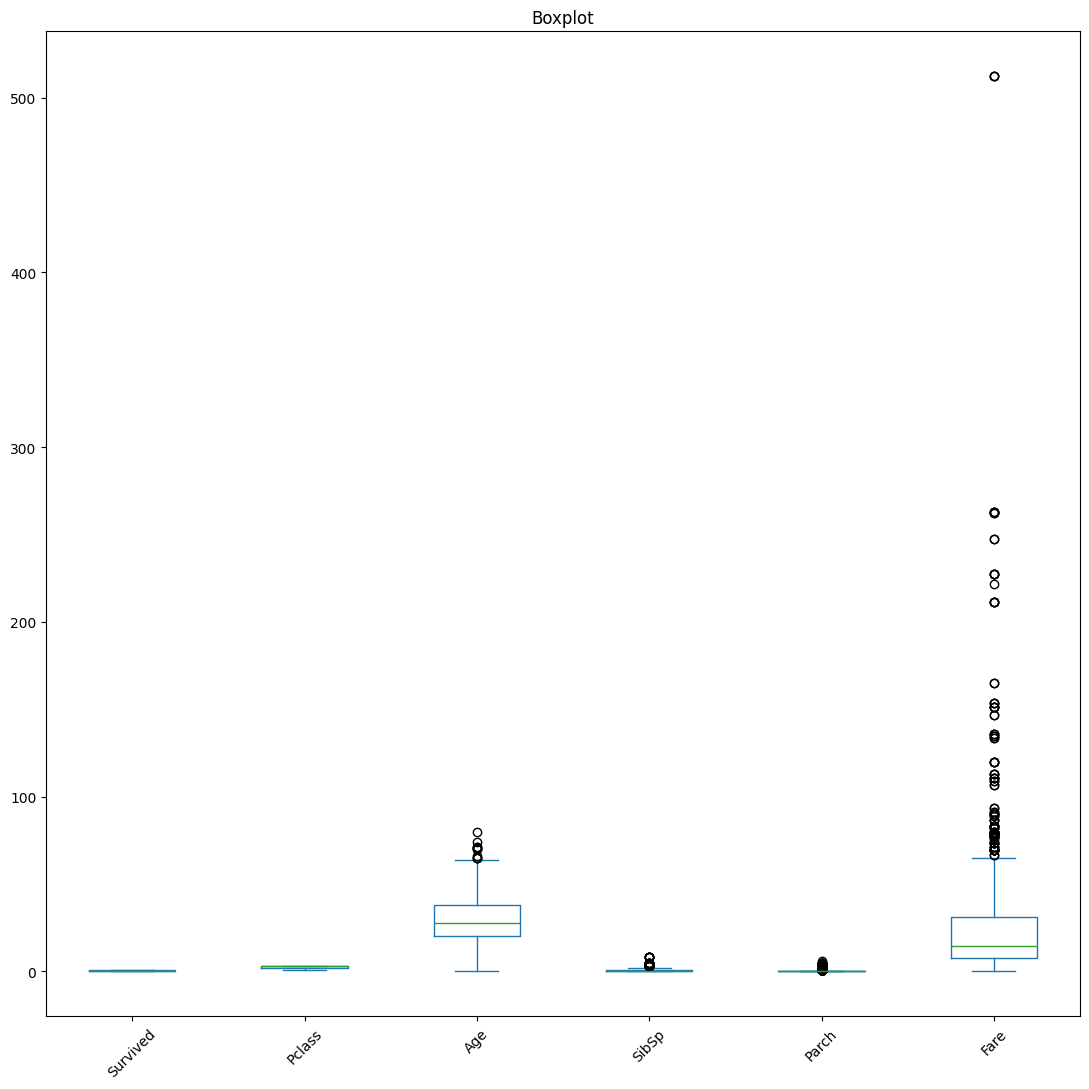

In [8]:
# create a visualisation to determine best course to fill in missing null values

data.plot(kind='box', title = 'Boxplot', figsize=(11,11))
plt.xticks(rotation=45)
plt.tight_layout()

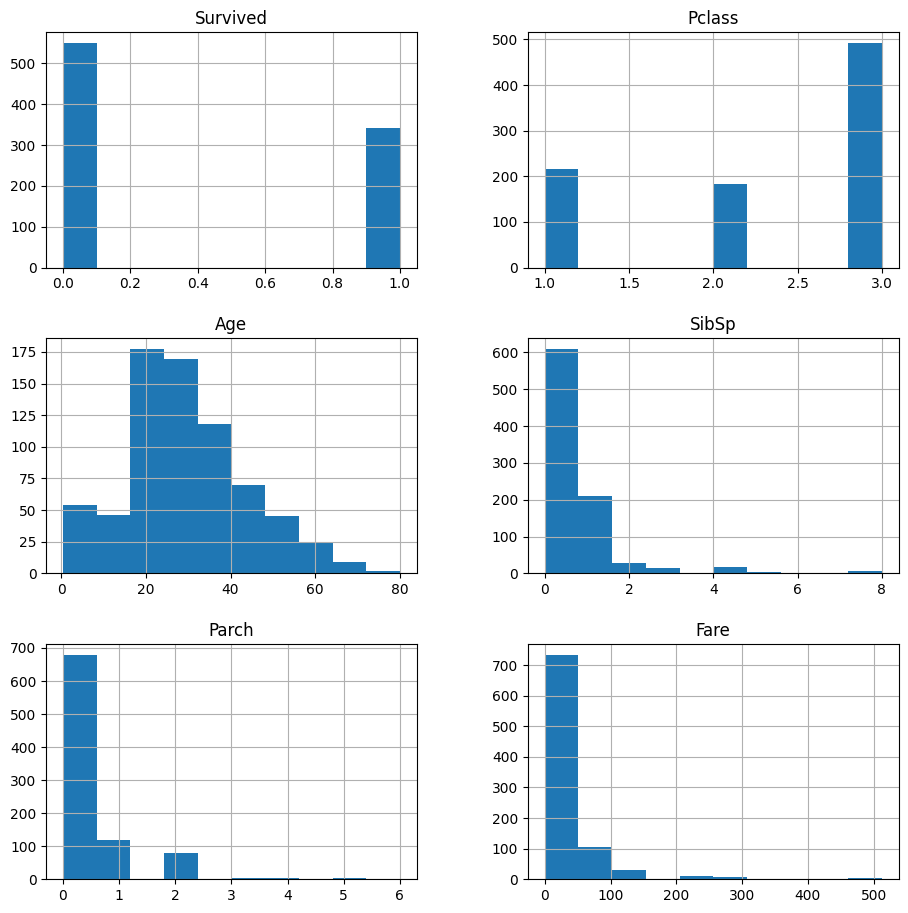

In [9]:
# visualisation 2

data.hist(bins=10, figsize=(11,11))
plt.show()

In [10]:
# replace missing values in dataset, using mean as there is not much skew in the 'Age' column's data

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
# check if all missing values have been treated

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
# now convert, via encoding, the necessary data into a numerical format

data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [13]:
# confirm changes

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [14]:
# visualisations of survival rate

data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

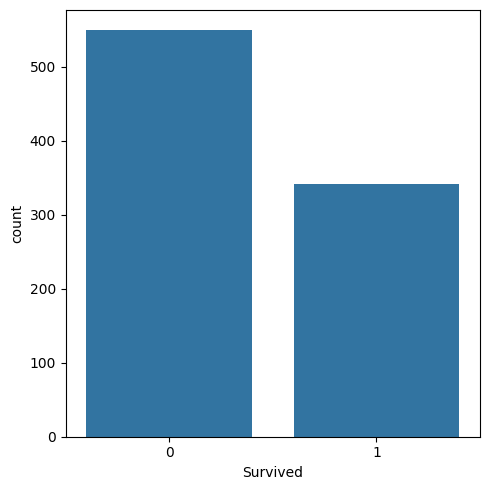

In [15]:
# Plot survival rate

plt.figure(figsize=(5,5))
sns.countplot(x= 'Survived', data= data)
plt.tight_layout()

<Axes: >

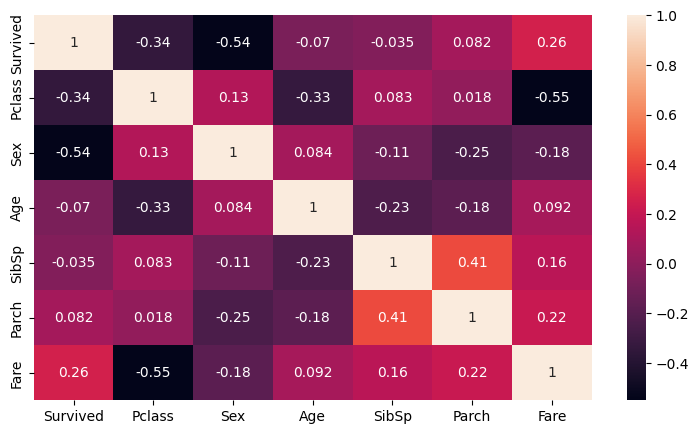

In [16]:
# correlation matrix to visualise the correlation of factors

plt.figure(figsize=(9,5))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot =True)

In [17]:
# PART 2 of assignment

# cleaning the test_data
# first I will import it

data1= pd.read_csv('test.csv')

# check if the data is identical to our training set
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# follow the same steps for EDA/cleaning as we did for the train_data
# basic statistics

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [19]:
# basic statistics (continued)

data1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# drop irrelevant columns

data1.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked',], inplace=True)

In [21]:
# check for null amounts

data1.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

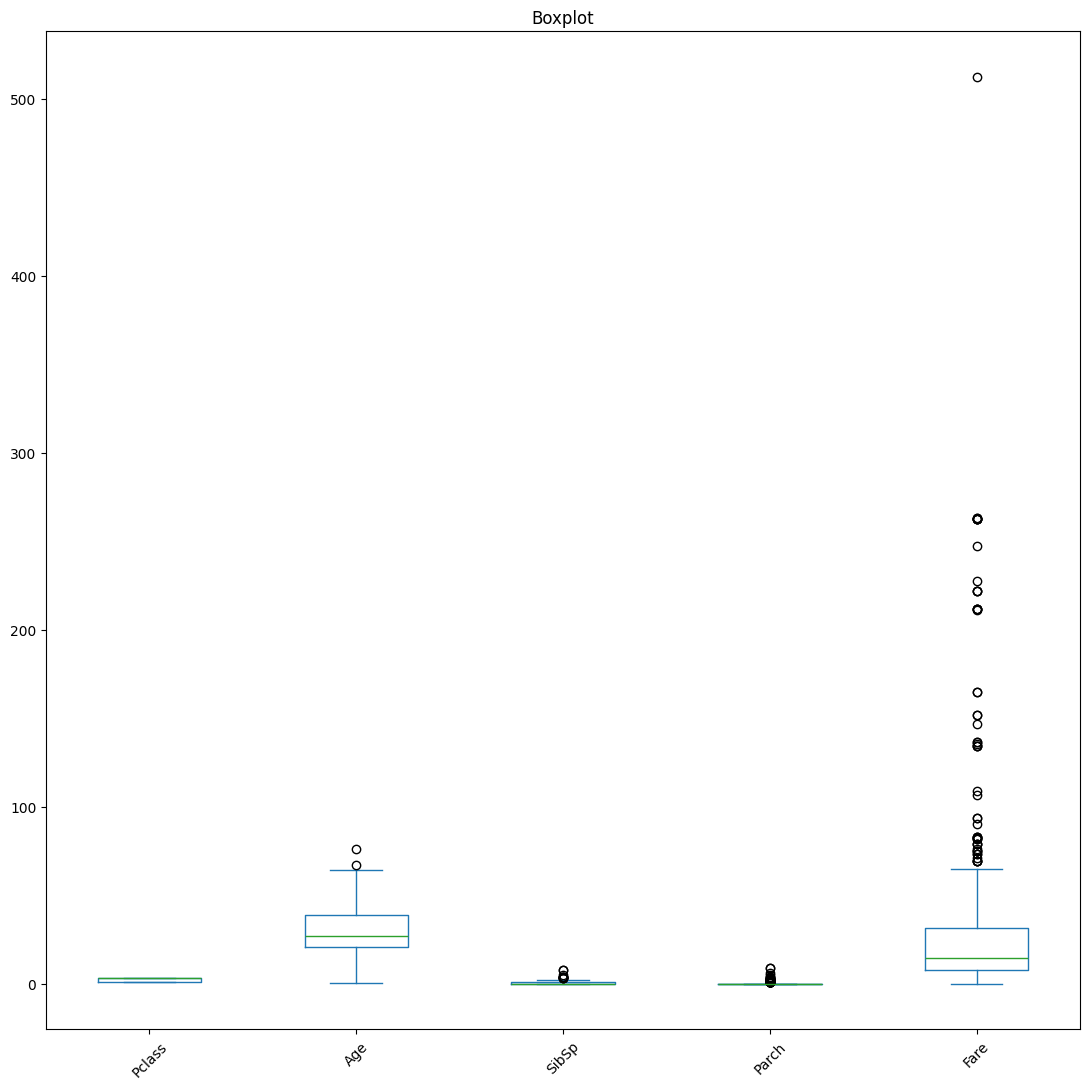

In [22]:
# just like before, I will create a visualisation to determine best course to fill in missing null values

data1.plot(kind='box', title = 'Boxplot', figsize=(11,11))
plt.xticks(rotation=45)
plt.tight_layout()

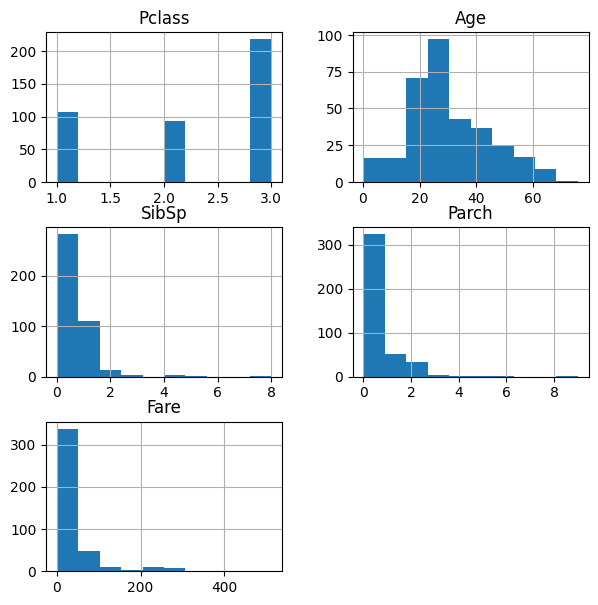

In [23]:
# visualisation 2

data1.hist(bins=10, figsize=(7,7))
plt.show()

In [24]:
# age is more skewed this time, as is fare which also has a lot of outliers, so I will replace their missing values with the median value(s)

data1['Age'] = data1['Age'].fillna(data1['Age'].median())
data1['Fare'] = data1['Fare'].fillna(data1['Fare'].median())

In [25]:
# confirm changes

data1.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [26]:
# encode sex column again

data1['Sex'] = data1['Sex'].map({'male': 0, 'female': 1})

In [27]:
# confirm changes

data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [28]:
# select independent and dependent variables

X = data.iloc[:, 1:]   
y = data.iloc[:, 0]    

In [29]:
# Split Dataset into Training and Testing Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=32)

In [30]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_final_test = sc.transform(data1)

In [31]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predict on the Test Data

y_test_pred = log_reg.predict(X_test)

In [33]:
# putting into a DataFrame

df = pd.DataFrame({'Actual_Value': y_test, 'Predicted_value': y_test_pred})
print(df)

     Actual_Value  Predicted_value
837             0                0
334             1                1
849             1                1
778             0                0
413             0                0
..            ...              ...
544             0                0
709             1                0
882             0                1
821             1                0
620             0                0

[268 rows x 2 columns]


In [34]:
# Calculate Accuracy Score

accuracy = accuracy_score(y_test, y_test_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.7761194029850746
